# Notebook3: Minimizing Functions of several variables

We start by setting up numpy and matplotlib

In [77]:
import numpy as np

%matplotlib inline

import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = [15, 6]

import mpl_toolkits.mplot3d  #for 3d plots
from matplotlib import cm

###Visualizing a function of 2 variables
Let us consider a simple function of two variables: $$f(x,y)=4(x-2)^2+4(y+1)^2-0.1xy$$

In [78]:
def f(x, y):
    return 4*(x-2)**2 + 4*(y+1)**2 -0.1*x*y

To visualize a function of 2 variables, we can use either the command plot_surface (for a 3d plot) or contour (for a contour plot).

First, we need to create a 2d grid of values for the input values:

In [79]:
x_values, y_values = np.meshgrid(np.linspace(-4, 5), np.linspace(-5, 4))

Then, for a 3d plot:

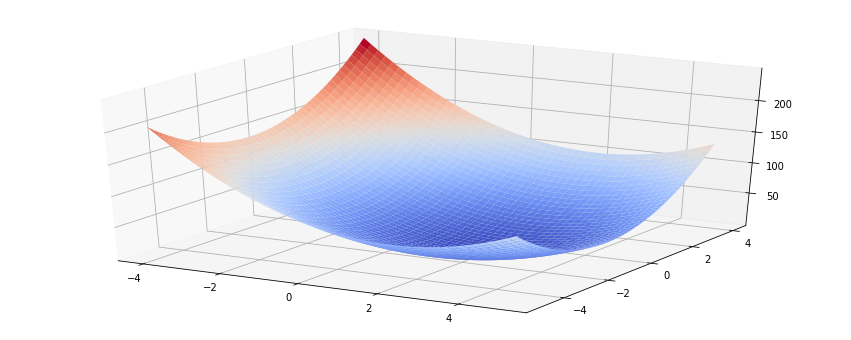

In [80]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

ax.plot_surface(x_values, y_values, f(x_values, y_values), cmap=cm.coolwarm)

For a contour plot:

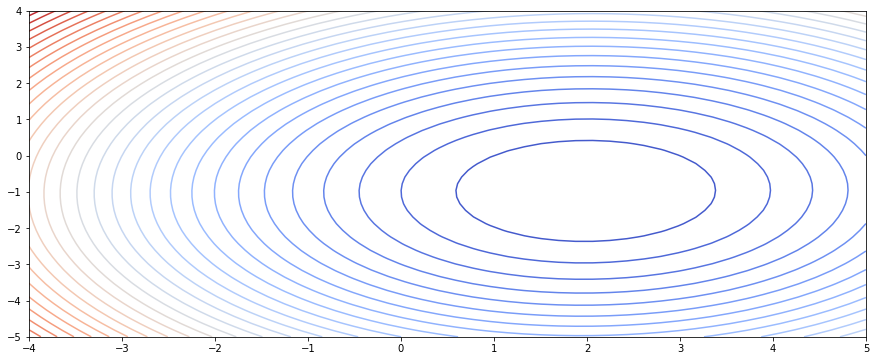

In [81]:
plt.contour(x_values, y_values, f(x_values, y_values), 30, cmap=cm.coolwarm)

### Let us now do some gradient descent

First, we need to have a function that can compute the gradient:

In [82]:
def gradient_f(x, y):
    return 4*2 * (x-2) - 0.1 * y, 4*2*(y+1) -0.1*x 

Now, let us visualize the progress of the gradient descent on a 3d plot.

(Press Ctrl+Enter repeatedly in the main cell to go through gradient descent iterations)

In [89]:
x0 = 0
y0 = 0

x0: 2.43968 y0: -1.22944
f(x0, y0): 1.2837888819200005
f'(x0, y0): (3.6403840000000005, -2.079488000000001)


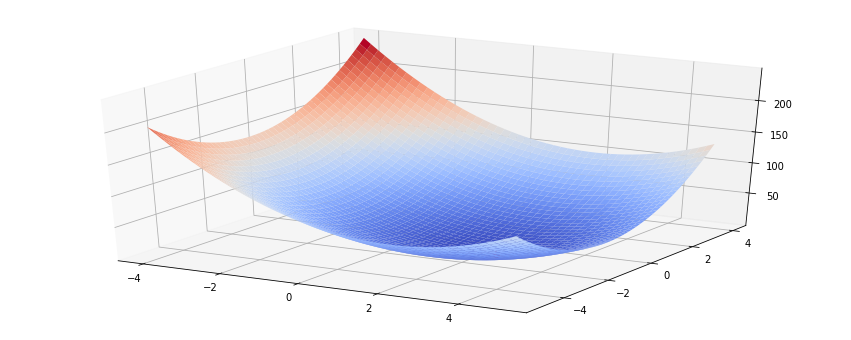

In [93]:
print("x0:", x0, "y0:", y0)
print("f(x0, y0):", f(x0, y0))
print("f'(x0, y0):", gradient_f(x0, y0))


fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

ax.plot_surface(x_values, y_values, f(x_values, y_values), cmap=cm.coolwarm)
ax.plot([x0], [y0], [f(x0,y0)], "ro")

dx0, dy0 = gradient_f(x0, y0)
x0 = x0 - 0.2 * dx0
y0 = y0 - 0.2 * dy0

This time, let us visualize the same gradient descent on a Contour Plot

In [132]:
x0 = 0
y0 = 0

x0: 1.863090209583079 y0: -0.9174251770120014
f(x0, y0): 0.2731761549456264
f'(x0, y0): (-1.0035358056341677, 0.4742895629456806)


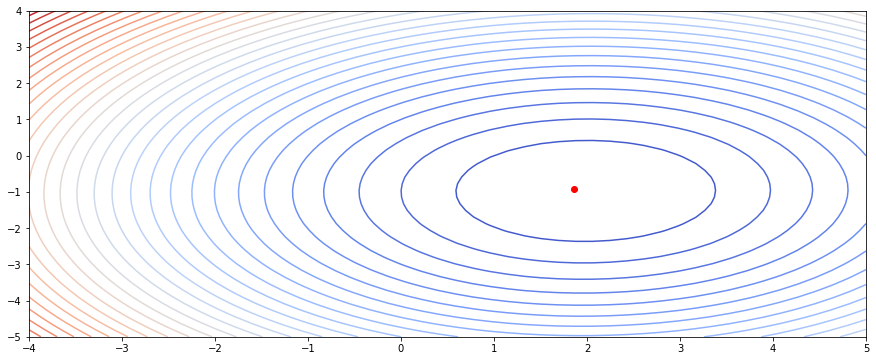

In [166]:
lr = 0.01

print("x0:", x0, "y0:", y0)
print("f(x0, y0):", f(x0, y0))
print("f'(x0, y0):", gradient_f(x0, y0))

plt.contour(x_values, y_values, f(x_values, y_values), 30, cmap=cm.coolwarm)
plt.plot([x0], [y0], "ro")

dx0, dy0 = gradient_f(x0, y0)
x0 = x0 - lr * dx0
y0 = y0 - lr * dy0

### Stochastic Gradient Descent
It turns out that, if we add random noise to our gradient (provided the noise is on average equal to zero), the gradient descent will work.

But we need to decrease the learning rate progressively in this case.

Let us use some random noise from a Normal distribution:

(We could use any other random distribution as long as its average is zero)

In [171]:
np.random.randn()

0.3428680558151758

Let us observe gradient descent when we add noise to the gradient: (Note that the learning rate is now decreasing with each step)

In [172]:
x0 = 0
y0 = 0
step = 1

x0: 0 y0: 0
f(x0, y0): 20.0
f'(x0, y0): (-16.0, 8.0)


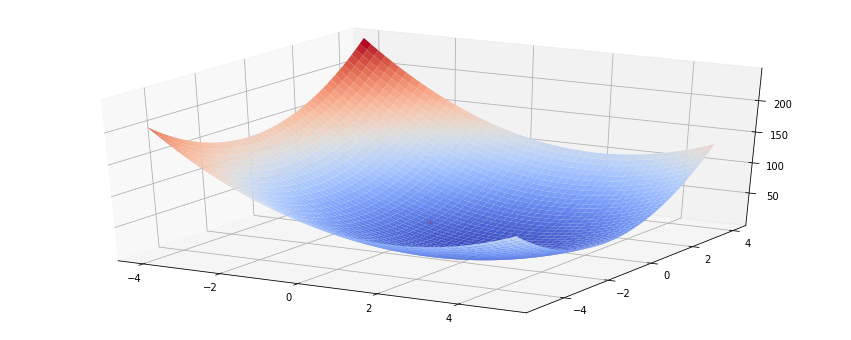

In [173]:
lr = 0.2 /np.sqrt(step)

print("x0:", x0, "y0:", y0)
print("f(x0, y0):", f(x0, y0))
print("f'(x0, y0):", gradient_f(x0, y0))

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

ax.plot_surface(x_values, y_values, f(x_values, y_values), cmap=cm.coolwarm)
ax.plot([x0], [y0], [f(x0,y0)], "ro")

dx0, dy0 = gradient_f(x0, y0)
dx0 = dx0 + np.random.randn()
dy0 = dy0 + np.random.randn()
x0 = x0 - lr * dx0
y0 = y0 - lr * dy0

Same thing with a contour plot:

In [174]:
x0 = 0
y0 = 0
step = 1

x0: 2.167335719690566 y0: -0.745514100209268
f(x0, y0): 0.5326351989982843
f'(x0, y0): (1.4132371675454534, 1.8191536263567993)


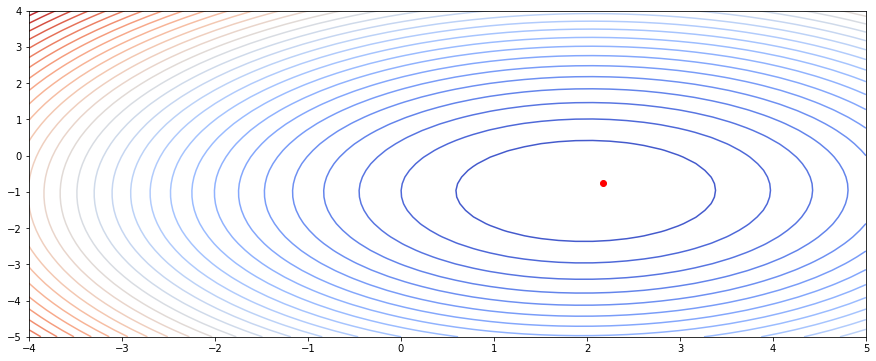

In [192]:
lr = 0.2 /np.sqrt(step)

print("x0:", x0, "y0:", y0)
print("f(x0, y0):", f(x0, y0))
print("f'(x0, y0):", gradient_f(x0, y0))

plt.contour(x_values, y_values, f(x_values, y_values), 30, cmap=cm.coolwarm)
plt.plot([x0], [y0], "ro")

dx0, dy0 = gradient_f(x0, y0)
dx0 = dx0 + np.random.randn()
dy0 = dy0 + np.random.randn()
x0 = x0 - lr * dx0
y0 = y0 - lr * dy0

## Minimizing using a specialized library

There actually exists many libraries providing functions for minimization. For Python, a convenient one is the one provided in the SciPy library.

In [167]:
import scipy
import scipy.optimize

In order to use the minimization functions provided by SciPy, our functions have to take a numpy array as input, and return a numpy array (for the gradient).

Therefore, we define the above function and its gradient again. This time, we assume a numpy array of size 2 as input.

In [168]:
def f_numpy(x):
    return 4*(x[0]-2)**2 + 4*(x[1]+1)**2 -0.1*x[0]*x[1]

In [169]:
def grad_f_numpy(x):
    return np.array([4*2 * (x[0]-2) - 0.1 * x[1], 4*2*(x[1]+1) -0.1*x[0]])

We can then use many different minimization methods. One that often work well in practice is called "L-BFGS-B".

In [170]:
scipy.optimize.minimize(f_numpy, np.array([0,0]), jac=grad_f_numpy, method="L-BFGS-B")

      fun: 0.1969057665260197
 hess_inv: <2x2 LbfgsInvHessProduct with dtype=float64>
      jac: array([-3.88578059e-16,  2.77555756e-17])
  message: b'CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL'
     nfev: 5
      nit: 4
   status: 0
  success: True
        x: array([ 1.9878106 , -0.97515237])

We see that we could obtain a value similar to the one we were obtaining with gradient descent. Algorithms such as "L-BFGS-B" are more sophisticated than simple Gradient Descent. However, we will see that they do not scale as well in the case of very large number of variables and very large number of examples.